# Import Dependencies

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_theme()

# Import Data, Quick Explore Data & Change Data Format

In [2]:
# Fetch data
transaction = pd.read_csv('ecommerce_dataset.csv')

In [3]:
transaction.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [4]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [5]:
# change order date to datetime format
transaction.created_at = pd.to_datetime(transaction.created_at)

# Drop Unused Columns

In [6]:
# drop unnamed columns
transaction.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [7]:
# check quick distribution of data
transaction.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


In [8]:
# because grand_total can't under 0, we must exclude data grand_total under 0
transaction = transaction[transaction.grand_total > 0]

In [9]:
# check null data
transaction.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                           5
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             163
sales_commission_code    134206
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [10]:
# drop null value
transaction = transaction.dropna()

# Rename Some Columns

In [11]:
transaction.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [12]:
# rename some columns
transaction.rename(columns={
    'category_name_1':'category_name',
    'Working Date':'Working_Date',
    ' MV ':'MV',
    'Customer Since':'Customer_Since',
    'Customer ID':'Customer_ID'
}, inplace=True)

In [13]:
transaction.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name', 'sales_commission_code',
       'discount_amount', 'payment_method', 'Working_Date', 'BI Status', 'MV',
       'Year', 'Month', 'Customer_Since', 'M-Y', 'FY', 'Customer_ID'],
      dtype='object')

# Simplify Payment Status

In [14]:
# becase there are a lot of payment status, so we must simplify it.
transaction.status = transaction.status.replace({
    'complete':'Completed',
    'received':'Completed',
    'cod':'Completed',
    'paid':'Completed',
    'closed':'Completed',
    'exchange':'Completed',
    'canceled':'Canceled',
    'order_refunded':'Canceled',
    'refund':'Canceled',
    'fraud':'Canceled',
    '\\N':'Canceled',
    'payment_review':'Pending',
    'pending':'Pending',
    'processing':'Pending',
    'holded':'Pending',
    'pending_paypal':'Pending'
})

# Explotatory Data Analysis

# Transaction Frequency by Payment Status

In [15]:
# Status Frequency
status_freq = transaction.status.value_counts()
status_freq = pd.DataFrame(status_freq).reset_index()
status_freq

,index,status
0,Completed,246148
1,Canceled,194407
2,Pending,50


In [16]:
status_freq.sort_values(['status'], ascending=False, inplace=True)

# visualization section
fig = px.bar(status_freq,x='status', y='index', text='status', 
labels={
    'index':'Status',
    'status':'Count Transaction'
}, title='Transaction Frequency by Status')
fig.update_traces(texttemplate='%{text:,}')

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig.show()

# Total Sales by Payment Status

In [17]:
# total sales by each status
status_sales = transaction.groupby(['status'])['grand_total'].sum()
status_sales = pd.DataFrame(status_sales).reset_index()
status_sales

,status,grand_total
0,Canceled,2.045247e+09
1,Completed,1.215807e+09
2,Pending,3.901544e+05


In [18]:
status_sales.sort_values(['status'], ascending=True, inplace=True)

# visualization section
fig = px.bar(status_sales,x='grand_total', y='status', text='grand_total', 
labels={
    'status':'Status',
    'grand_total':'Grand Total'
}, title='Total Sales by Status')
fig.update_traces(texttemplate='%{text:,}')

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig.show()

# Monthly Completed Sales, Monthly Canceled Sales & Monthly Sales Comparation between Completed & Canceled Sales

In [19]:
# Most Popular Product Buy by Completed Status
completed_sales = transaction[transaction.status == 'Completed']

completed_sales = completed_sales.groupby(['category_name'])['grand_total'].sum()
completed_sales = pd.DataFrame(completed_sales).reset_index()
completed_sales.sort_values(['grand_total'], ascending=True, inplace=True)
completed_sales.head()

,category_name,grand_total
2,Books,1.246184e+06
11,School & Education,2.699777e+06
10,Others,6.840843e+06
5,Health & Sports,1.404333e+07
7,Kids & Baby,1.587658e+07


In [20]:
# visualization section
fig = px.bar(completed_sales, x='grand_total', y='category_name', text='grand_total',
            labels={'category_name':'Category Name', 'grand_total':'Grand Total'},
            title="Product Sales by Completed Status")
fig.update_traces(texttemplate='%{text:,}')

fig.update_layout(
    autosize=False,
    width=500,
    height=500
)
fig.show()

In [21]:
# Most Popular Product by Canceled Status
canceled_sales = transaction[transaction.status == 'Canceled']

canceled_sales = canceled_sales.groupby(['category_name'])['grand_total'].sum()
canceled_sales = pd.DataFrame(canceled_sales).reset_index()
canceled_sales.sort_values(['grand_total'], ascending=True, inplace=True)
canceled_sales.head()

,category_name,grand_total
2,Books,6.655325e+05
11,School & Education,2.060318e+06
10,Others,1.098058e+07
5,Health & Sports,1.558802e+07
12,Soghaat,1.582373e+07


In [22]:
fig = px.bar(canceled_sales, x='grand_total', y='category_name', text='grand_total',
                labels={'category_name':'Category Name', 'grand_total':'Grand Total'},
                title='Product Sales by Canceled Status')
fig.update_traces(texttemplate='%{text:,}')

fig.update_layout(
    autosize=False,
    width=500,
    height=500
)
fig.show()

In [23]:
# Monthly sales comparation between Completed & Canceled Status
# create new columns to get month & year data from created_at columns
transaction['month_year'] = pd.to_datetime(transaction.created_at.dt.strftime('%Y-%m'))
transaction.drop(columns=['M-Y'], inplace=True)
transaction.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name,sales_commission_code,...,payment_method,Working_Date,BI Status,MV,Year,Month,Customer_Since,FY,Customer_ID,month_year
0,211131.0,Completed,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,FY17,1.0,2016-07-01
1,211133.0,Canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,FY17,2.0,2016-07-01
2,211134.0,Canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,FY17,3.0,2016-07-01
3,211135.0,Completed,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,FY17,4.0,2016-07-01
4,211136.0,Canceled,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,FY17,5.0,2016-07-01


In [24]:
# monthly sales completed status
monthly_completed_sales = transaction[transaction.status == 'Completed']
monthly_completed_sales = monthly_completed_sales.groupby(['month_year'])['grand_total'].sum()
monthly_completed_sales = pd.DataFrame(monthly_completed_sales).reset_index()
monthly_completed_sales['status'] = 'Completed'
monthly_completed_sales.head()

,month_year,grand_total,status
0,2016-07-01,11720820.27,Completed
1,2016-08-01,17588479.23,Completed
2,2016-09-01,27503668.06,Completed
3,2016-10-01,24824142.90,Completed
4,2016-11-01,97895239.77,Completed


In [25]:
# monthly sales by canceled status
monthly_canceled_sales = transaction[transaction.status == 'Canceled']
monthly_canceled_sales = monthly_canceled_sales.groupby(['month_year'])['grand_total'].sum()
monthly_canceled_sales = pd.DataFrame(monthly_canceled_sales).reset_index()
monthly_canceled_sales['status'] = 'Canceled'
monthly_canceled_sales.head()

,month_year,grand_total,status
0,2016-07-01,3.157113e+07,Canceled
1,2016-08-01,3.864725e+07,Canceled
2,2016-09-01,6.279442e+07,Canceled
3,2016-10-01,7.324191e+07,Canceled
4,2016-11-01,1.704093e+08,Canceled


In [26]:
# join monthly_completed_sales & monthly_canceled_sales
concat_data = [monthly_completed_sales, monthly_canceled_sales]
group_monthly_sales = pd.concat(concat_data)

In [27]:
# visualization section
fig = px.bar(group_monthly_sales, x='month_year', y='grand_total', color='status', text='grand_total', 
            labels={'month_year':'Monthly Transaction', 'grand_total':'Grand Total'},
            title='Monthly Transaction Comparison')
fig.update_traces(texttemplate='%{text:,}')

fig.update_layout(
    autosize=True,
    width=1200,
    height=500,
    barmode='group'
)
fig.show()

# Transacion Frequency Segmentation

In [28]:
# check customer repeat transaction
repeat_trans = transaction[(transaction.status == 'Completed') | (transaction.status == 'Pending')]
repeat_trans.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name,sales_commission_code,...,payment_method,Working_Date,BI Status,MV,Year,Month,Customer_Since,FY,Customer_ID,month_year
0,211131.0,Completed,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,FY17,1.0,2016-07-01
3,211135.0,Completed,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,FY17,4.0,2016-07-01
6,211138.0,Completed,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147449,Beauty & Grooming,\N,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,FY17,7.0,2016-07-01
7,211139.0,Completed,2016-07-01,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450,Soghaat,\N,...,cod,7/1/2016,Net,170,2016.0,7.0,2016-7,FY17,6.0,2016-07-01
10,211142.0,Completed,2016-07-01,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,100147453,Appliances,\N,...,cod,7/1/2016,Net,"5,500",2016.0,7.0,2016-7,FY17,9.0,2016-07-01


In [29]:
# sort data based on Customer ID & Order Date
repeat_trans.sort_values(['Customer_ID', 'created_at'], inplace=True)
repeat_trans.reset_index(inplace=True, drop=True)
repeat_trans.head(10)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name,sales_commission_code,...,payment_method,Working_Date,BI Status,MV,Year,Month,Customer_Since,FY,Customer_ID,month_year
0,211131.0,Completed,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,FY17,1.0,2016-07-01
1,473369.0,Completed,2017-05-19,BT_BT-422,530.0,1.0,1245.0,100306394,Men's Fashion,\N,...,cod,5/19/2017,Net,530,2017.0,5.0,2016-7,FY17,3.0,2017-05-01
2,473370.0,Completed,2017-05-19,ALHAMRA_US-0961-K,299.0,1.0,1245.0,100306394,Men's Fashion,\N,...,cod,5/19/2017,Net,299,2017.0,5.0,2016-7,FY17,3.0,2017-05-01
3,473371.0,Completed,2017-05-19,e-seller_7,66.0,1.0,1245.0,100306394,Mobiles & Tablets,\N,...,cod,5/19/2017,Net,66,2017.0,5.0,2016-7,FY17,3.0,2017-05-01
4,473372.0,Completed,2017-05-19,BD_BIG DEAL_16,350.0,1.0,1245.0,100306394,Mobiles & Tablets,\N,...,cod,5/19/2017,Net,350,2017.0,5.0,2016-7,FY17,3.0,2017-05-01
5,211135.0,Completed,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,FY17,4.0,2016-07-01
6,212570.0,Completed,2016-07-04,kcc_krone deal,360.0,1.0,160.0,100148389,Beauty & Grooming,R-FSD-52352,...,cod,7/4/2016,Net,360,2016.0,7.0,2016-7,FY17,4.0,2016-07-01
7,214138.0,Completed,2016-07-13,PC_1P SP CRW-006,150.0,1.0,150.0,100149432,Men's Fashion,R-FSD-52352,...,cod,7/13/2016,Net,150,2016.0,7.0,2016-7,FY17,4.0,2016-07-01
8,215020.0,Completed,2016-07-15,Karak_Honey 1 Kg,1275.0,1.0,1275.0,100150135,Superstore,R-FSD-52352,...,cod,7/15/2016,Net,"1,275",2016.0,7.0,2016-7,FY17,4.0,2016-07-01
9,216369.0,Completed,2016-07-19,mau_117018 Hedonic Velvet Blush,340.0,2.0,680.0,100151149,Beauty & Grooming,R-FSD-52352,...,cod,7/19/2016,Net,680,2016.0,7.0,2016-7,FY17,4.0,2016-07-01


In [30]:
# count investor transaction
def purchase_rate(Customer_ID):
    purchase_rate = [1]
    counter = 1
    for i in range(1, len(Customer_ID)):
        if Customer_ID[i] != Customer_ID[i - 1]:
            purchase_rate.append(1)
            counter = 1
        else:
            counter += 1
            purchase_rate.append(counter)
    return purchase_rate
repeat_trans['purchase_rate'] = purchase_rate(repeat_trans['Customer_ID'])

In [31]:
# check looping purchase rate
repeat_trans.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name,sales_commission_code,...,Working_Date,BI Status,MV,Year,Month,Customer_Since,FY,Customer_ID,month_year,purchase_rate
0,211131.0,Completed,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,FY17,1.0,2016-07-01,1
1,473369.0,Completed,2017-05-19,BT_BT-422,530.0,1.0,1245.0,100306394,Men's Fashion,\N,...,5/19/2017,Net,530,2017.0,5.0,2016-7,FY17,3.0,2017-05-01,1
2,473370.0,Completed,2017-05-19,ALHAMRA_US-0961-K,299.0,1.0,1245.0,100306394,Men's Fashion,\N,...,5/19/2017,Net,299,2017.0,5.0,2016-7,FY17,3.0,2017-05-01,2
3,473371.0,Completed,2017-05-19,e-seller_7,66.0,1.0,1245.0,100306394,Mobiles & Tablets,\N,...,5/19/2017,Net,66,2017.0,5.0,2016-7,FY17,3.0,2017-05-01,3
4,473372.0,Completed,2017-05-19,BD_BIG DEAL_16,350.0,1.0,1245.0,100306394,Mobiles & Tablets,\N,...,5/19/2017,Net,350,2017.0,5.0,2016-7,FY17,3.0,2017-05-01,4


In [32]:
# get max number of transaction based on looping user activity
repeat_trans = repeat_trans.groupby(['Customer_ID']).aggregate({'purchase_rate':'max'})
repeat_trans = pd.DataFrame(repeat_trans).reset_index()
repeat_trans.head()

,Customer_ID,purchase_rate
0,1.0,1
1,3.0,4
2,4.0,254
3,6.0,1
4,7.0,4


In [33]:
# segmentation user transaction frequency
def count_transaction(repeat_trans):
    if(repeat_trans['purchase_rate'] == 1):
        return '1'
    elif (repeat_trans['purchase_rate'] >= 2) & (repeat_trans['purchase_rate'] <= 10):
        return '2-10'
    elif (repeat_trans['purchase_rate'] >= 11) & (repeat_trans['purchase_rate'] <= 50):
        return '11-50'
    elif (repeat_trans['purchase_rate'] >= 51) & (repeat_trans['purchase_rate'] <= 100):
        return '51-100'
    elif (repeat_trans['purchase_rate'] >= 101) & (repeat_trans['purchase_rate'] <= 500):
        return '101-500'
    else:
        return '>500'
repeat_trans['investor_flag'] = repeat_trans.apply(count_transaction, axis=1)

In [34]:
repeat_trans.head()

,Customer_ID,purchase_rate,investor_flag
0,1.0,1,1
1,3.0,4,2-10
2,4.0,254,101-500
3,6.0,1,1
4,7.0,4,2-10


In [35]:
# grouping segmentation user transaction
group_repeat_transaction = repeat_trans.groupby(['investor_flag'])['Customer_ID'].count()
group_repeat_transaction = pd.DataFrame(group_repeat_transaction).reset_index()
group_repeat_transaction.sort_values(['Customer_ID'], ascending=False, inplace=True)
group_repeat_transaction.head()

,investor_flag,Customer_ID
0,1,30035
3,2-10,28124
2,11-50,3183
4,51-100,223
1,101-500,109


In [36]:
# visualization section
fig = px.bar(group_repeat_transaction, x='investor_flag', y='Customer_ID', text='Customer_ID',
            labels={'investor_flag':'Transaction Criteria', 'Customer_ID':'Unique Investor'},
            title='Customer Transaction Criteria')
fig.update_traces(texttemplate='%{text:,}')

fig.update_layout(
    autosize=False,
    width=1000,
    height=500
)
fig.show()

# Multiple Product Type Transaction

In [37]:
# Transaction multiple product type
multiple_product_type = transaction[transaction.status == 'Completed']
multiple_product_type = multiple_product_type.groupby(['Customer_ID'])['category_name'].nunique()
multiple_product_type = pd.DataFrame(multiple_product_type).reset_index()
multiple_product_type.head(10)

,Customer_ID,category_name
0,1.0,1
1,3.0,2
2,4.0,14
3,6.0,1
4,7.0,4
5,9.0,1
6,10.0,1
7,11.0,2
8,12.0,1
9,13.0,12


In [38]:
# flagging invstor by count category
def flag_product(multiple_product_type):
    if(multiple_product_type['category_name'] == 1):
        return '1'
    elif (multiple_product_type['category_name'] >= 2) & (multiple_product_type['category_name'] <= 5):
        return '2-5'
    elif (multiple_product_type['category_name'] >= 6) & (multiple_product_type['category_name'] <= 10):
        return '6-10'
    else:
        return '>10'
multiple_product_type['product_flag'] = multiple_product_type.apply(flag_product, axis=1)

multiple_product_type.head()

,Customer_ID,category_name,product_flag
0,1.0,1,1
1,3.0,2,2-5
2,4.0,14,>10
3,6.0,1,1
4,7.0,4,2-5


In [39]:
# grouping to product_flag & grouping data
multiple_product_type = multiple_product_type.groupby(['product_flag'])['Customer_ID'].nunique()
multiple_product_type = pd.DataFrame(multiple_product_type).reset_index()
multiple_product_type.head()

,product_flag,Customer_ID
0,1,43910
1,2-5,16120
2,6-10,1488
3,>10,169


In [40]:
# visualization section
fig = px.bar(multiple_product_type, x='product_flag', y='Customer_ID', text='Customer_ID', 
            labels={'product_flag':'Count Prouct', 'Customer_ID':'Unique Investor'},
            title='Multiple Product Type')
fig.update_traces(texttemplate='%{text:,}')

fig.update_layout(
    autosize=True,
    width=500,
    height=500
)

fig.show()

# RFM

In [41]:
# fetch data to new dataframe
rfm = transaction[transaction.status == 'Completed']

In [42]:
# check latest transaction data
rfm['created_at'].max()

Timestamp('2018-08-28 00:00:00')

In [43]:
# add dummy date to dataframe & change format to datetime()
rfm['dummy_date'] = '2018-08-28 00:00:00'
rfm['dummy_date'] = pd.to_datetime(rfm['dummy_date'])

In [44]:
# count gap days between columns created_at & dummy_date
rfm['gap_days'] = (rfm['dummy_date'] - rfm['created_at']).dt.days

In [45]:
# grouping data
rfmscore = rfm.groupby(['Customer_ID']).aggregate({'gap_days':'min', 'status':'count', 'grand_total':'sum'}).reset_index()
rfmscore.head()

,Customer_ID,gap_days,status,grand_total
0,1.0,788,1,1950.00
1,3.0,466,4,4980.00
2,4.0,1,254,1312876.25
3,6.0,788,1,170.00
4,7.0,500,4,105.00


In [46]:
rfmscore.rename(columns={
    'gap_days':'Recency',
    'status':'Frequency',
    'grand_total':'Monetary'}, inplace=True)

In [47]:
rfmscore.columns

Index(['Customer_ID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [48]:
# set quantiles number
quantiles = rfmscore.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Customer_ID': {0.25: 20302.5, 0.5: 40838.0, 0.75: 64888.5},
 'Recency': {0.25: 283.0, 0.5: 448.0, 0.75: 623.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'Monetary': {0.25: 1042.5, 0.5: 3195.0, 0.75: 13382.32}}

In [49]:
# Plotting Recency
def plotting_recency(rfmscore):
    if (rfmscore['Recency'] <= 283):
        return 1
    elif (rfmscore['Recency'] >= 284) & (rfmscore['Recency'] <= 448):
        return 2
    elif (rfmscore['Recency'] >= 449) & (rfmscore['Recency'] <= 623):
        return 3
    else:
        return 4
rfmscore['R'] = rfmscore.apply(plotting_recency, axis=1)

In [50]:
# Plotting requency
def plotting_frequency(rfmscore):
    if (rfmscore['Frequency'] == 1):
        return 4
    elif (rfmscore['Frequency'] == 2):
        return 3
    elif (rfmscore['Frequency'] == 3):
        return 2
    else:
        return 1
rfmscore['F'] = rfmscore.apply(plotting_frequency, axis=1)

In [51]:
# Plotting Monetary
def plotting_monetary(rfmscore):
    if (rfmscore['Monetary']<= 1042.5):
        return 4
    elif (rfmscore['Monetary'] > 1042.5) & (rfmscore['Monetary'] <= 3195):
        return 3
    elif (rfmscore['Monetary'] >= 3196) & (rfmscore['Monetary'] <= 13382.32):
        return 2
    else:
        return 1
rfmscore['M'] = rfmscore.apply(plotting_monetary, axis=1)        

In [52]:
rfmscore.columns

Index(['Customer_ID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M'], dtype='object')

In [53]:
rfmscore['score'] = rfmscore['R'] + rfmscore['F'] + rfmscore['M']

In [54]:
# Classification investor
rfmscore['scoring'] = rfmscore.R.map(str) + rfmscore.F.map(str) + rfmscore.M.map(str)

Reference to classification investor : 
https://www.nextlytics.com/hubfs/Google%20Drive%20Integration/BlogCustomerSegmentation_V2%20en-2.png

In [55]:
# Flagging customer based on classification investor
rfmscore.scoring = rfmscore.scoring.replace({'111':'Top Customer',
                                                '121':'Top Customer',
                                                '112':'Top Customer',
                                                '122':'Top Customer',
                                                '113':'Active Customer',
                                                '114':'Active Customer',
                                                '123':'Active Customer',
                                                '124':'Active Customer',
                                                '131':'Active Customer',
                                                '132':'Active Customer',
                                                '133':'Active Customer',
                                                '134':'Active Customer',
                                                '211':'Emerging Customer',
                                                '212':'Emerging Customer',
                                                '232':'Emerging Customer',
                                                '222':'Emerging Customer',
                                                '221':'Emerging Customer',
                                                '231':'Emerging Customer',
                                                '213':'Unsteady Customer',
                                                '214':'Unsteady Customer',
                                                '223':'Unsteady Customer',
                                                '224':'Unsteady Customer',
                                                '233':'Unsteady Customer',
                                                '234':'Unsteady Customer',
                                                '141':'Unsteady Customer',
                                                '142':'Unsteady Customer',
                                                '143':'Unsteady Customer',
                                                '144':'Unsteady Customer',
                                                '241':'Unsteady Customer',
                                                '242':'Unsteady Customer',
                                                '243':'Unsteady Customer',
                                                '244':'Unsteady Customer',
                                                '311':'Customer at Risk',
                                                '312':'Customer at Risk',
                                                '313':'Customer at Risk',
                                                '314':'Customer at Risk',
                                                '411':'Customer at Risk',
                                                '412':'Customer at Risk',
                                                '413':'Customer at Risk',
                                                '414':'Customer at Risk',
                                                '321':'Customer at Risk',
                                                '322':'Customer at Risk',
                                                '323':'Customer at Risk',
                                                '324':'Customer at Risk',
                                                '421':'Customer at Risk',
                                                '422':'Customer at Risk',
                                                '423':'Customer at Risk',
                                                '424':'Customer at Risk',
                                                '331':'Customer at Risk',
                                                '332':'Customer at Risk',
                                                '341':'Customer at Risk',
                                                '342':'Customer at Risk',
                                                '333':'Potential Lost Customer',
                                                '334':'Potential Lost Customer',
                                                '343':'Potential Lost Customer',
                                                '344':'Potential Lost Customer',
                                                '431':'Inactive Customer',
                                                '432':'Inactive Customer',
                                                '441':'Inactive Customer',
                                                '442':'Inactive Customer',
                                                '433':'Lost Customer',
                                                '434':'Lost Customer',
                                                '443':'Lost Customer',
                                                '444':'Lost Customer'})

In [56]:
# Grouping segment
grouping_segment = rfmscore.groupby(['scoring'])['Customer_ID'].count()
grouping_segment = pd.DataFrame(grouping_segment).reset_index()
grouping_segment.sort_values(['Customer_ID'], ascending=False, inplace=True)
grouping_segment

,scoring,Customer_ID
7,Unsteady Customer,14069
1,Customer at Risk,10267
4,Lost Customer,9806
6,Top Customer,7909
5,Potential Lost Customer,7786
2,Emerging Customer,5926
0,Active Customer,2983
3,Inactive Customer,2941


In [57]:
# visualization section
fig = px.bar(
    grouping_segment, x='scoring', y='Customer_ID', text='Customer_ID',
    labels={'scoring':'Customer Segment', 'Customer_ID':'Unique Investor'},
    title='Customer Segmentation'
)
fig.update_traces(texttemplate='%{text:,}')

fig.update_layout(
    autosize=True,
    width=1000,
    height=500
)

fig.show()

# Standardize Recency, Frequency & Monetary

In [58]:
rfmscore_log = pd.DataFrame(rfmscore)

In [62]:
# convert scoring to number
def convert_scoring(rfmscore_log):
    if (rfmscore_log['scoring'] == 'Top Customer'):
        return 1
    elif (rfmscore_log['scoring'] == 'Active Customer'):
        return 2
    elif (rfmscore_log['scoring'] == 'Emerging Customer'):
        return 3
    elif (rfmscore_log['scoring'] == 'Unsteady Customer'):
        return 4
    elif (rfmscore_log['scoring'] == 'Customer at Risk'):
        return 5
    else:
        return 6
rfmscore_log['rfmgroups'] = rfmscore_log.apply(convert_scoring, axis=1)

In [64]:
rfmscore_log.dtypes

Customer_ID    float64
Recency          int64
Frequency        int64
Monetary       float64
R                int64
F                int64
M                int64
score            int64
scoring         object
rfmgroups        int64
dtype: object

In [66]:
# Standardize Features
from sklearn.preprocessing import StandardScaler

# Separate X and Y
X = rfmscore_log.drop(['Customer_ID', 'R', 'F', 'M', 'score', 'scoring', 'rfmgroups'],axis=1)
Y = rfmscore_log["rfmgroups"].tolist()

#  Transform to Standard/Gaussian Distribution
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[ 1.98272778e+00, -1.58851288e-01, -1.08338636e-01],
       [ 9.52027239e-02,  5.16698774e-04, -8.98544549e-02],
       [-2.63057104e+00,  1.32811822e+01,  7.88882252e+00],
       [ 1.98272778e+00, -1.58851288e-01, -1.19197330e-01],
       [ 2.94506612e-01,  5.16698774e-04, -1.19593855e-01]])

# K-Means Clustering

In [67]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=123)
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=123)

In [68]:
# match the result
df_kmeans = pd.DataFrame(kmeans.fit_transform(X_scaled))
df_kmeans.columns = ["A", "B", "C", "D", "E", "F"]
df_kmeans['group'] = kmeans.fit_predict(X_scaled)
df_kmeans.tail(5)

,A,B,C,D,E,F,group
61682,1.553416,3.807934,218.214565,51.311220,2.668213,9.484271,1
61683,1.543105,3.810548,218.093127,51.229710,2.669520,9.378307,1
61684,1.569634,3.814303,218.258426,51.373710,2.676474,9.552394,1
61685,1.562690,3.820030,218.232931,51.264657,2.679381,9.450137,1
61686,1.574302,3.820089,218.248742,51.371448,2.682129,9.548371,1


In [69]:
df_kmeans['group'].value_counts()

1    22637
0    19932
4    18945
5      157
3       15
2        1
Name: group, dtype: int64

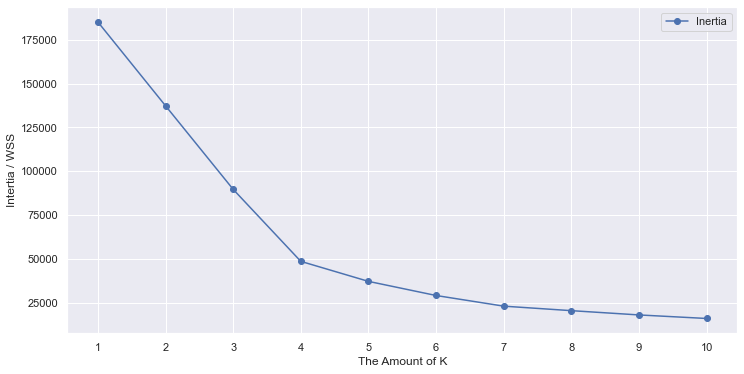

In [70]:
# 1. Elbow Method (Calculate the Intertia)

intertia = []

# Iteration k = 1 to k = 10
# Inside the iteration, train the KMeans based on k
# Then store the inertia value for each iteration
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state=123)
    kmeans.fit(X_scaled)
    intertia.append(kmeans.inertia_)

# Visualize the Inertia Values
plt.figure(figsize=(12,6))
plt.plot(intertia, marker='o', color='b', label='Inertia') 
plt.xticks(list(range(10)),list(range(1,11)))
plt.xlabel('The Amount of K')
plt.ylabel('Intertia / WSS')
plt.legend() 
plt.show()

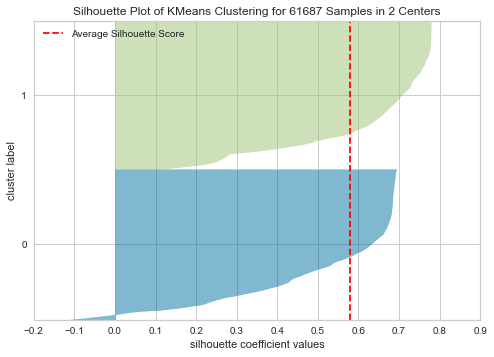

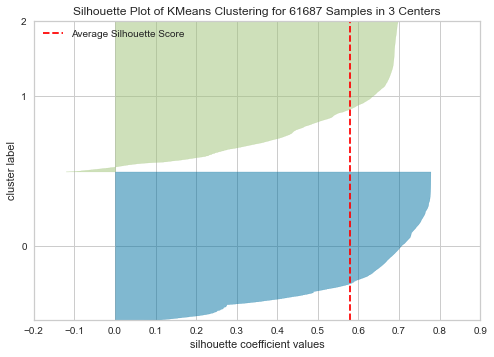

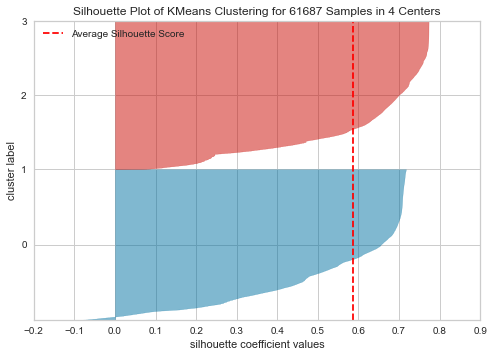

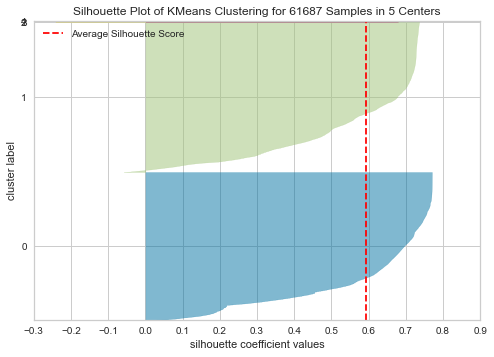

In [71]:
# 2. Silhouette Method
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,6):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(X_scaled)
    visualizer.show()